In [1]:
from nba_api.stats.endpoints import leaguedashplayershotlocations
import nba_api
import json
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

In [42]:
years = ["2020-21"]

teams = ['HOU']
team_to_id = {'NYK': '1610612752', 'UTA': '1610612762', 'BOS': '1610612738', 'DAL':'1610612742', 'HOU': '1610612745', 'CHI': '1610612741'}
knicks_dates = ['05/16/2021', '05/15/2021', '05/13/21', '05/11/21', '05/09/21', '05/07/21', '05/05/21', '05/03/21', '05/02/21', '04/28/21', '04/26/21', '04/24/21']
knicks_outcome = ['W', 'W', 'W', 'L', 'W', 'L', 'L', 'W', 'W', 'W', 'L', 'W']
knicks_date_to_id = {'05/16/2021': '1', '05/15/2021': '2', '05/13/21': '3', '05/11/21': '4', '05/09/21': '5', '05/07/21': '6', '05/05/21': '7', '05/03/21': '8', '05/02/21': '9', '04/28/21': '10', '04/26/21': '51', '04/24/21': '52'}
knicks_ortg = ['103.7', '119.4', '108.2', '100.1', '110.8', '106.2', '93.3', '125.4', '126.6', '121.3', '118.5', '130.3']
knicks_pd = ['4', '9', '4', '-2', '6', '-23', '-16', '14', '25', '19', '-8', '17']

jazz_dates = ['05/16/2021', '05/14/2021', '05/12/21', '05/10/21', '05/08/21', '05/07/21', '05/05/21', '05/03/21', '05/01/21', '04/30/21', '04/28/21', '04/26/21']
jazz_outcome = ['W', 'W', 'L', 'L', 'W', 'W', 'W', 'W', 'W', 'L', 'W', 'L']
jazz_date_to_id = {'05/16/2021': '11', '05/14/2021': '12', '05/12/21': '13', '05/10/21': '14', '05/08/21': '15', '05/07/21': '16', '05/05/21': '17', '05/03/21': '18', '05/01/21': '19', '04/30/21': '20', '04/28/21': '53', '04/26/21': '54'}
jazz_ortg = ['119.6', '115.9', '110.2', '117.9', '121.0', '130.7', '128.5', '114.7', '111.5', '106.1', '153.5', '107.4']
jazz_pd = ['12', '16', '-7', '-3', '8', '7', '32', '11', '4', '-21', '49', '-1']

mavs_dates = ['05/16/2021', '05/14/2021', '05/12/2021', '05/11/2021', '05/09/2021', '05/07/2021', '05/06/2021', '05/04/2021', '05/02/2021', '05/01/2021', '04/29/21', '04/27/21']
mavs_outcome = ['L', 'W', 'W', 'L', 'W', 'W', 'W', 'W', 'L', 'W', 'W', 'W']
mavs_date_to_id = {'05/16/2021': '21', '05/14/2021': '22', '05/12/2021': '23', '05/11/2021': '24', '05/09/2021': '25', '05/07/2021': '26', '05/06/2021': '27', '05/04/2021': '28', '05/02/2021': '29', '05/01/2021': '30', '04/29/21': '55', '04/27/21': '56'}
mavs_ortg = ['123.0', '118.6', '123.2', '112.3', '126.1', '118.6', '112.0', '133.9', '103.2', '126.8', '115.9', '129.9']
mavs_pd = ['-15', '4', '18', '-29', '27', '20', '4', '14', '-12', '1', '10', '30']

bulls_dates = ['05/16/2021', '05/15/2021','05/13/2021','05/11/2021','05/09/2021','05/07/2021','05/06/2021','05/03/2021','05/01/2021','04/30/2021', '04/28/21', '04/26/21']
bulls_outcome = ['W', 'L', 'W', 'L', 'W', 'W', 'W', 'L', 'L', 'L', 'L', 'W']
bulls_date_to_id = {'05/16/2021' : '31', '05/15/2021' : '32','05/13/2021' : '33','05/11/2021' : '34','05/09/2021' : '35','05/07/2021' : '36','05/06/2021' : '37','05/03/2021' : '38','05/01/2021' : '39','04/30/2021' : '40', '04/28/21': '57', '04/26/21': '58'}               
bulls_pd = ['6','-14','12','-8','12','22','21','-12','-11','-10', '-19', '8']
bulls_ortg = ['116.1','98.1','117.6','112.5','115.4','125.2','121.1','101.0','103.0','99.2', '100.9', '117.6']


rockets_dates = ['05/16/2021', '05/14/2021', '05/12/2021', '05/10/2021', '05/08/2021', '05/07/2021', '05/05/2021', '05/02/2021', '05/01/2021', '04/29/2021', '04/27/21', '04/24/21']
rockets_outcome = ['L', 'W', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'W', 'L', 'L']
rockets_date_to_id = {'05/16/2021': '41', '05/14/2021': '42', '05/12/2021': '43', '05/10/2021': '44', '05/08/2021': '45', '05/07/2021': '46', '05/05/2021': '47', '05/02/2021': '48', '05/01/2021': '49', '04/29/2021': '50', '04/27/21': '59', '04/24/21': '60'}
rockets_pd =['-29','7','-2','-11','-8', '-8', '-20','-25','-26','7', '-7', '-13']
rockets_ortg = ['93','120','119.2','126','113.2','121.7','116.5','100.6','82.5','132.5', '103.1', '113.2']

celtics_dates = ['05/16/2021', '05/15/2021', '05/12/21', '05/11/21', '05/09/21', '05/07/21', '05/05/21', '05/02/21', '04/30/21', '04/28/21']
celtics_outcome = ['L', 'W', 'L', 'L', 'L', 'L', 'W', 'L', 'W', 'W']
celtics_date_to_id = {'05/16/2021': '51', '05/15/2021': '52', '05/12/21': '53', '05/11/21': '54', '05/09/21': '55', '05/07/21': '56', '05/05/21': '57', '05/02/21': '58', '04/30/21': '59', '04/28/21': '60'}
celtics_ortg = ['99.3', '122.0', '95.8', '120.9', '124.8', '102.4', '130.0', '117.5', '128.6', '127.0']
celtics_pd = ['-4', '24', '-8', '-8', '-6', '-22', '36', '-10', '3', '9']


master_df = pd.DataFrame(columns = [
       'PLAYER_ID',
       'PLAYER_NAME',
        'NICKNAME',
       'TEAM_ID',
       'TEAM_ABBREVIATION',
       'AGE',
       'ZONE',
       'FGM',
       'FGA',
       'FG_PCT',
       'SEASON'
])

team_dates = rockets_dates
team_outcome = rockets_outcome
team_date_to_id = rockets_date_to_id
team_ortg = rockets_ortg
team_pd = rockets_pd


for team in teams:
    for j in range(len(team_dates)):
        raw_data = leaguedashplayershotlocations.LeagueDashPlayerShotLocations(
            date_from_nullable = team_dates[j],
            date_to_nullable = team_dates[j], 
            team_id_nullable = team_to_id[team]
        )

        content = json.loads(raw_data.get_json())

        #Pulling the data from the dictionary
        resultSet = content['resultSets']

        data = resultSet['rowSet']

        data_filterable = []
        for player in data:
            ra = player[:6] + ['Restricted Area']
            for i in range(6,9):
                ra.append(player[i])

            paint = player[:6] + ['In The Paint (Non-RA)']
            for i in range(9,12):
                paint.append(player[i])

            mid = player[:6] + ['Mid-Range']
            for i in range(12,15):
                mid.append(player[i])

            lc3 = player[:6] + ['Left Corner 3']
            for i in range(15,18):
                lc3.append(player[i])

            rc3 = player[:6] + ['Right Corner 3']
            for i in range(18,21):
                rc3.append(player[i])

            above3 = player[:6] + ['Above the Break 3']
            for i in range(21,24):
                above3.append(player[i])

            back = player[:6] + ['Backcourt']
            for i in range(24,27):
                back.append(player[i])

            corner = player[:6] + ['Corner 3']
            for i in range(27,30):
                corner.append(player[i])

            data_filterable.append(ra)
            data_filterable.append(paint)
            data_filterable.append(mid)
            data_filterable.append(lc3)
            data_filterable.append(rc3)
            data_filterable.append(above3)
            data_filterable.append(back)
            data_filterable.append(corner)

        df_filterable = pd.DataFrame(data_filterable, columns = [
           'PLAYER_ID',
           'PLAYER_NAME',
            'NICKNAME',
           'TEAM_ID',
           'TEAM_ABBREVIATION',
           'AGE',
           'ZONE',
           'FGM',
           'FGA',
           'FG_PCT'])

        if team_outcome[j] == 'W':
            win = 1
        else:
            win = 0 
        
        df_filterable["game_id"] = team_date_to_id[team_dates[j]]
        df_filterable["win"] = win
        df_filterable["pd"] = team_pd[j]
        df_filterable["ortg"] = team_ortg[j]
        

        master_df = master_df.append(df_filterable)

    master_df.to_csv('rockets_data.csv')

In [48]:
knicks = pd.read_csv('knicks_data.csv')
knicks = knicks.drop(columns = ['Unnamed: 0', 'AGE', 'SEASON', 'TEAM_ID', 'PLAYER_ID', 'FG_PCT', 'NICKNAME'])
mavs = pd.read_csv('mavs_data.csv')
mavs = mavs.drop(columns = ['Unnamed: 0', 'AGE', 'SEASON', 'TEAM_ID', 'PLAYER_ID', 'FG_PCT', 'NICKNAME'])
jazz = pd.read_csv('jazz_data.csv')
jazz = jazz.drop(columns = ['Unnamed: 0', 'AGE', 'SEASON', 'TEAM_ID', 'PLAYER_ID', 'FG_PCT', 'NICKNAME'])
bulls = pd.read_csv('bulls_data.csv')
bulls = bulls.drop(columns = ['Unnamed: 0', 'AGE', 'SEASON', 'TEAM_ID', 'PLAYER_ID', 'FG_PCT', 'NICKNAME'])
rockets = pd.read_csv('rockets_data.csv')
rockets = rockets.drop(columns = ['Unnamed: 0', 'AGE', 'SEASON', 'TEAM_ID', 'PLAYER_ID', 'FG_PCT', 'NICKNAME'])
celtics = pd.read_csv('celtics_data.csv')
celtics = celtics.drop(columns = ['Unnamed: 0', 'AGE', 'SEASON', 'TEAM_ID', 'PLAYER_ID', 'FG_PCT', 'NICKNAME'])
celtics.head()

,PLAYER_NAME,TEAM_ABBREVIATION,ZONE,FGM,FGA,game_id,win,pd,ortg
0,Aaron Nesmith,BOS,Restricted Area,0.0,1.0,51,0.0,-4,99.3
1,Aaron Nesmith,BOS,In The Paint (Non-RA),0.0,2.0,51,0.0,-4,99.3
2,Aaron Nesmith,BOS,Mid-Range,1.0,2.0,51,0.0,-4,99.3
3,Aaron Nesmith,BOS,Left Corner 3,0.0,0.0,51,0.0,-4,99.3
4,Aaron Nesmith,BOS,Right Corner 3,0.0,0.0,51,0.0,-4,99.3


In [49]:
full = knicks.append(mavs).append(jazz).append(bulls).append(rockets)#.append(celtics)
full

,PLAYER_NAME,TEAM_ABBREVIATION,ZONE,FGM,FGA,game_id,win,pd,ortg
0,Alec Burks,NYK,Restricted Area,1.0,3.0,1,1.0,4,103.7
1,Alec Burks,NYK,In The Paint (Non-RA),0.0,0.0,1,1.0,4,103.7
2,Alec Burks,NYK,Mid-Range,0.0,0.0,1,1.0,4,103.7
3,Alec Burks,NYK,Left Corner 3,0.0,1.0,1,1.0,4,103.7
4,Alec Burks,NYK,Right Corner 3,1.0,1.0,1,1.0,4,103.7
...,...,...,...,...,...,...,...,...,...
803,Kenyon Martin Jr.,HOU,Left Corner 3,0.0,0.0,60,0.0,-13,113.2
804,Kenyon Martin Jr.,HOU,Right Corner 3,0.0,0.0,60,0.0,-13,113.2
805,Kenyon Martin Jr.,HOU,Above the Break 3,1.0,2.0,60,0.0,-13,113.2
806,Kenyon Martin Jr.,HOU,Backcourt,0.0,0.0,60,0.0,-13,113.2


In [201]:
# team = knicks.groupby(['ZONE', 'game_id']).sum()
# team.head()
# team['win'] = np.where(team['win']>=1, 1, 0)
# team['FG%'] = team['FGM'] / team['FGA']
# team.head()
# #type(team)

In [154]:
two_zones = ['Mid-Range']
two = full[full['ZONE'].isin(two_zones)]
two_ppa = (two['FGM'].sum() * 2) / two['FGA'].sum()
print(two_ppa)

three_zones = ['Above the Break 3']
three = full[full['ZONE'].isin(three_zones)]
three_ppa = (three['FGM'].sum() * 3) / three['FGA'].sum()
print(three_ppa)

total_ppa = ((three['FGM'].sum() * 3) + (two['FGM'].sum() * 2)) / (three['FGA'].sum() + two['FGA'].sum())
total_ppa
# atb_team = atb.groupby(['game_id']).sum()
# atb_team['win'] = np.where(atb_team['win']>=1, 1, 0)
# atb_team['FG%'] = atb_team['FGM'] / atb_team['FGA']
# atb_team.head()

0.794435857805255
1.1164021164021165


1.0276831345826236

In [29]:
# zone = full.loc[full["ZONE"] == 'Right Corner 3']
# zone_team = zone.groupby(['game_id']).mean()



# zone_team['win'] = np.where(zone_team['win']>=1, 1, 0)
# zone_team['FG%'] = zone_team['FGM'] / zone_team['FGA']
# zone_team = zone_team.dropna()
# zone_team.head()

,FGM,FGA,win,ortg,pd,FG%
game_id,,,,,,
1,2.0,4.0,1,9.717111e-50,3.748163e-51,0.500000
2,5.0,5.0,1,1.118827e-49,8.433366e-51,1.000000
3,6.0,7.0,1,1.082000e-47,4.000000e-49,0.857143
4,0.0,3.0,0,1.748039e-45,-3.492585e-47,0.000000
5,3.0,5.0,1,1.934892e-45,1.047776e-46,0.600000


In [169]:
right1 = full.loc[full["ZONE"] == 'Right Corner 3']
right_team = right1.groupby(['game_id']).sum()
right_team['FG%'] = right_team['FGM'] / right_team['FGA']
right_team = right_team[['FGM', 'FGA', 'FG%']]

In [170]:
right2 = full[full["ZONE"] == 'Right Corner 3']
right_team2 = right2.groupby(['game_id']).mean()
right_team2 = right_team2[['win', 'ortg', 'pd']]

In [171]:
zone_team = pd.merge(right_team,right_team2,on='game_id')
#zone_team = zone_team.dropna()
zone_team.head()
print(zone_team['FGA'].sum())
print(zone_team['FGM'].sum()) 
#zone_team

263.0
120.0


In [147]:
pearsonr(zone_team['FG%'],zone_team['pd'])

(0.5073305263423483, 3.518363693743784e-05)

In [172]:
from sklearn.tree import DecisionTreeClassifier
new = zone_team.drop(columns = ['FG%', 'FGA', 'pd', 'ortg'])
#new = zone_team
X = new.drop(columns = ['win'])
y = new['win']
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X,y)

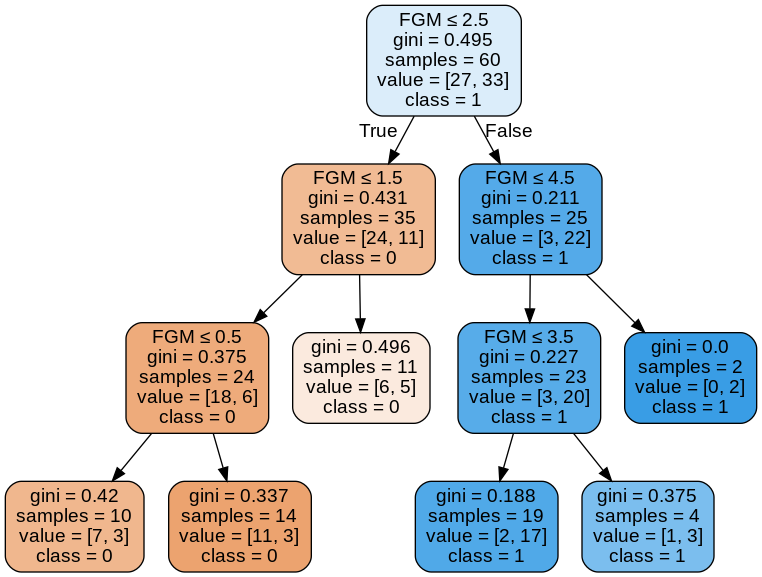

In [173]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('rc.png')
Image(graph.create_png())

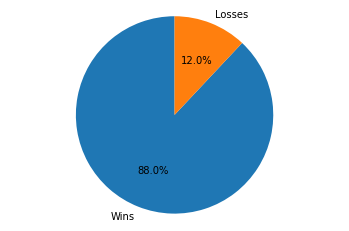

In [175]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Wins', 'Losses'
sizes = [22, 3]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Previous Code Below

In [17]:
from nba_api.stats.endpoints import leaguedashplayershotlocations
import nba_api
import json
import pandas as pd

years = ["2019-20", "2020-21"]
shot_clock_ranges = ['24-22', '22-18 Very Early', '18-15 Early', '15-7 Average', '7-4 Late', '4-0 Very Late']
outcome = ['W', 'L']
dict_shot_clock = {"24-22": "24-22", '22-18 Very Early': '22-18', '18-15 Early': '18-15', '15-7 Average': '15-7', '7-4 Late':'7-4', '4-0 Very Late': '4-0'}

for result in outcome:
    for year in years: 
        for elem in shot_clock_ranges:
            raw_data = leaguedashplayershotlocations.LeagueDashPlayerShotLocations(
                season = year,
                shot_clock_range_nullable = elem,
                outcome_nullable = result
            )

            content = json.loads(raw_data.get_json())

            #Pulling the data from the dictionary
            resultSet = content['resultSets']

            data = resultSet['rowSet']
            df = pd.DataFrame(data, columns = [
               'PLAYER_ID',
               'PLAYER_NAME',
               'TEAM_ID',
               'TEAM_ABBREVIATION',
               'AGE',
               'FGM',
               'FGA',
               'FG_PCT',
               'FGM',
               'FGA',
               'FG_PCT',
               'FGM',
               'FGA',
               'FG_PCT',
               'FGM',
               'FGA',
               'FG_PCT',
               'FGM',
               'FGA',
               'FG_PCT',
               'FGM',
               'FGA',
               'FG_PCT',
               'FGM',
               'FGA',
               'FG_PCT',
               'FGM',
               'FGA',
               'FG_PCT'])

            df.head()

            df.to_csv(result + '_' + dict_shot_clock[elem] + '_shooting_' + year + '.csv')

In [26]:
from nba_api.stats.endpoints import leaguedashplayershotlocations
import nba_api
import json
import pandas as pd

years = ["2019-20", "2020-21"]
shot_clock_ranges = ['24-22', '22-18 Very Early', '18-15 Early', '15-7 Average', '7-4 Late', '4-0 Very Late']
outcome = ['L']

master_df = pd.DataFrame(columns = [
       'PLAYER_ID',
       'PLAYER_NAME',
       'TEAM_ID',
       'TEAM_ABBREVIATION',
       'AGE',
       'SHOT-CLOCK',
       'ZONE',
       'FGM',
       'FGA',
       'FG_PCT',
       'SEASON'
])

for result in outcome:
    for year in years:
        for elem in shot_clock_ranges:
            shot_clock = elem
            raw_data = leaguedashplayershotlocations.LeagueDashPlayerShotLocations(
                season = year,
                shot_clock_range_nullable = shot_clock,
                outcome_nullable = result
            )

            content = json.loads(raw_data.get_json())

            #Pulling the data from the dictionary
            resultSet = content['resultSets']

            data = resultSet['rowSet']

            data_filterable = []
            for player in data:
                ra = player[:5] + [shot_clock, 'Restricted Area']
                for i in range(5,8):
                    ra.append(player[i])

                paint = player[:5] + [shot_clock, 'In The Paint (Non-RA)']
                for i in range(8,11):
                    paint.append(player[i])

                mid = player[:5] + [shot_clock, 'Mid-Range']
                for i in range(11,14):
                    mid.append(player[i])

                lc3 = player[:5] + [shot_clock, 'Left Corner 3']
                for i in range(14,17):
                    lc3.append(player[i])

                rc3 = player[:5] + [shot_clock, 'Right Corner 3']
                for i in range(17,20):
                    rc3.append(player[i])

                above3 = player[:5] + [shot_clock, 'Above the Break 3']
                for i in range(20,23):
                    above3.append(player[i])

                back = player[:5] + [shot_clock, 'Backcourt']
                for i in range(23,26):
                    back.append(player[i])

                corner = player[:5] + [shot_clock, 'Corner 3']
                for i in range(26,29):
                    corner.append(player[i])

                data_filterable.append(ra)
                data_filterable.append(paint)
                data_filterable.append(mid)
                data_filterable.append(lc3)
                data_filterable.append(rc3)
                data_filterable.append(above3)
                data_filterable.append(back)
                data_filterable.append(corner)

            df_filterable = pd.DataFrame(data_filterable, columns = [
           'PLAYER_ID',
           'PLAYER_NAME',
           'TEAM_ID',
           'TEAM_ABBREVIATION',
           'AGE',
           'SHOT-CLOCK',
           'ZONE',
           'FGM',
           'FGA',
           'FG_PCT'])

            season = [year] * len(df_filterable)
            df_filterable["SEASON"] = season

            master_df = master_df.append(df_filterable)
    
master_df.to_csv('L_data.csv')

In [ ]:
from nba_api.stats.endpoints import leaguedashplayershotlocations
import nba_api
import json
import pandas as pd

years = ["2020-21"]
teams = ['NYK']
dates = ['05/16/2021', '05/15/2021', '05/13/21', '05/11/21', '05/09/21', '05/07/21', '05/05/21', '05/03/21', '05/02/21', '04/28/21']
outcome = ['W', 'W', 'W', 'L', 'W', 'L', 'L', 'W', 'W', 'W']


date_to_id = {'05/16/2021': '1', '05/15/2021': '2', '05/13/21': '3', '05/11/21': '4', '05/09/21': '5', '05/07/21': '6', '05/05/21': '7', '05/03/21': '8', '05/02/21': '9', '04/28/21': '10'}
team_to_id = {'NYK': '1610612752'}

master_df = pd.DataFrame(columns = [
       'PLAYER_ID',
       'PLAYER_NAME',
       'TEAM_ID',
       'TEAM_ABBREVIATION',
       'AGE',
       'ZONE',
       'FGM',
       'FGA',
       'FG_PCT',
       'SEASON'
])

for team in teams:
    for i in range(len(dates)):
        raw_data = leaguedashplayershotlocations.LeagueDashPlayerShotLocations(
            date_from_nullable = dates[i],
            date_to_nullable = dates[i], 
            team_id_nullable = team_to_id[team]
        )

        content = json.loads(raw_data.get_json())

        #Pulling the data from the dictionary
        resultSet = content['resultSets']

        data = resultSet['rowSet']

        data_filterable = []
        for player in data:
            ra = player[:5] + ['Restricted Area']
            for i in range(5,8):
                ra.append(player[i])

            paint = player[:5] + ['In The Paint (Non-RA)']
            for i in range(8,11):
                paint.append(player[i])

            mid = player[:5] + ['Mid-Range']
            for i in range(11,14):
                mid.append(player[i])

            lc3 = player[:5] + ['Left Corner 3']
            for i in range(14,17):
                lc3.append(player[i])

            rc3 = player[:5] + ['Right Corner 3']
            for i in range(17,20):
                rc3.append(player[i])

            above3 = player[:5] + ['Above the Break 3']
            for i in range(20,23):
                above3.append(player[i])

            back = player[:5] + ['Backcourt']
            for i in range(23,26):
                back.append(player[i])

            corner = player[:5] + ['Corner 3']
            for i in range(26,29):
                corner.append(player[i])

            data_filterable.append(ra)
            data_filterable.append(paint)
            data_filterable.append(mid)
            data_filterable.append(lc3)
            data_filterable.append(rc3)
            data_filterable.append(above3)
            data_filterable.append(back)
            data_filterable.append(corner)

        df_filterable = pd.DataFrame(data_filterable, columns = [
           'PLAYER_ID',
           'PLAYER_NAME',
           'TEAM_ID',
           'TEAM_ABBREVIATION',
           'AGE',
           'ZONE',
           'FGM',
           'FGA',
           'FG_PCT'])

        if outcome[i] == 'W':
            win = 1
        else:
            win = 0 
        
        df_filterable["game_id"] = date_to_id[dates[i]]
        df_filterable["win"] = win
        

        master_df = master_df.append(df_filterable)

    master_df.to_csv('knicks_data.csv')

In [15]:
import pandas as pd
data = pd.read_csv('complete_data_formatted.csv')
data = data.drop(columns = ['Unnamed: 0'])
data.head()

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,SHOT-CLOCK,ZONE,FGM,FGA,FG_PCT,SEASON
0,203932,Aaron Gordon,1610612753,ORL,24.0,24-22,Restricted Area,23.0,37.0,0.622,2019-20
1,203932,Aaron Gordon,1610612753,ORL,24.0,24-22,In The Paint (Non-RA),1.0,1.0,1.000,2019-20
2,203932,Aaron Gordon,1610612753,ORL,24.0,24-22,Mid-Range,0.0,1.0,0.000,2019-20
3,203932,Aaron Gordon,1610612753,ORL,24.0,24-22,Left Corner 3,0.0,0.0,0.000,2019-20
4,203932,Aaron Gordon,1610612753,ORL,24.0,24-22,Right Corner 3,0.0,0.0,0.000,2019-20


In [16]:
knicks = data[data['TEAM_ABBREVIATION']=='NYK']
knicks_2021 = knicks[knicks['SEASON'] == '2020-21']
sc = knicks_2021[knicks_2021['SHOT-CLOCK']=='15-7 Average']
zone_sc = sc[sc['ZONE']=='Restricted Area']
zone_sc = zone_sc.sort_values(by=['FG_PCT'], ascending=False)
min_zone_sc = zone_sc[zone_sc['FGA'] >= 25]
min_zone_sc.head()

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,SHOT-CLOCK,ZONE,FGM,FGA,FG_PCT,SEASON
42112,201959,Taj Gibson,1610612752,NYK,35.0,15-7 Average,Restricted Area,56.0,73.0,0.767,2020-21
41424,203457,Nerlens Noel,1610612752,NYK,27.0,15-7 Average,Restricted Area,56.0,78.0,0.718,2020-21
41296,1629011,Mitchell Robinson,1610612752,NYK,23.0,15-7 Average,Restricted Area,53.0,78.0,0.679,2020-21
41528,1630167,Obi Toppin,1610612752,NYK,23.0,15-7 Average,Restricted Area,27.0,41.0,0.659,2020-21
40536,203944,Julius Randle,1610612752,NYK,26.0,15-7 Average,Restricted Area,75.0,129.0,0.581,2020-21
